# 347. Top K Frequent Elements

## Problem

Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

 

Example 1:

Input: nums = [1,1,1,2,2,3], k = 2
Output: [1,2]
Example 2:

Input: nums = [1], k = 1
Output: [1]

## Solution  

1.Think how can we get 3 largets elements in a list or 3 smallest element in a list

2.For solving above the best possible way is to use min_heap/max_heap where you can obtain smallest /largest fastly 

3.Above solution is transform and lookup solution , but if we want to do a pre-sorting and sorting methodology kind of solution

4.We can't use insertion/selection/bubble hence remaining sorts are merge sort (difference/union/set etc ..) and Quick sort (Quick select methodology)

5.Quick select is a process where you choose a pivot (random value in list) and while sorting the list based on pivot if index of interst is available we can return it



In [1]:
# Solution 1:- using heapq

import heapq
class Solution1(object):
    def topKFrequent(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        h_m = {}
        f_list = []
        for elem in nums:
            if elem in h_m.keys():
                h_m[elem]+=1
            else:
                h_m[elem] = 1
        
        return heapq.nlargest(k,h_m.keys(),key = h_m.get)
            
        
        
        

In [2]:
s = Solution1()

nums = [1,1,1,2,2,3]
k = 2
print(s.topKFrequent(nums,k))

[1, 2]


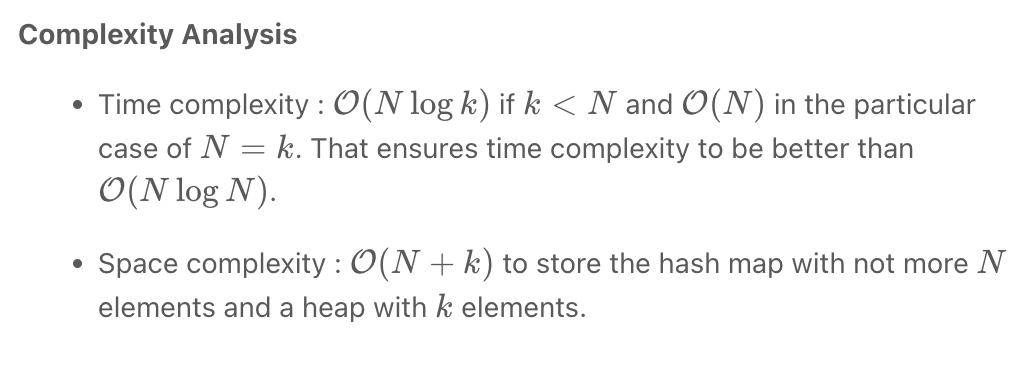

## Solution 2

Approach 2: Quickselect (Hoare's selection algorithm)
Quickselect is a textbook algorthm typically used to solve the problems "find kth something": kth smallest, kth largest, kth most frequent, kth less frequent, etc. Like quicksort, quickselect was developed by Tony Hoare, and also known as Hoare's selection algorithm.
The approach is the same as for quicksort.

One chooses a pivot and defines its position in a sorted array in a linear time using so-called partition algorithm.

As an output, we have an array where the pivot is on its perfect position in the ascending sorted array, sorted by the frequency. All elements on the left of the pivot are less frequent than the pivot, and all elements on the right are more frequent or have the same frequency.

Hence the array is now split into two parts. If by chance our pivot element took N - kth final position, then kk elements on the right are these top kk frequent we're looking for. If not, we can choose one more pivot and place it in its perfect positio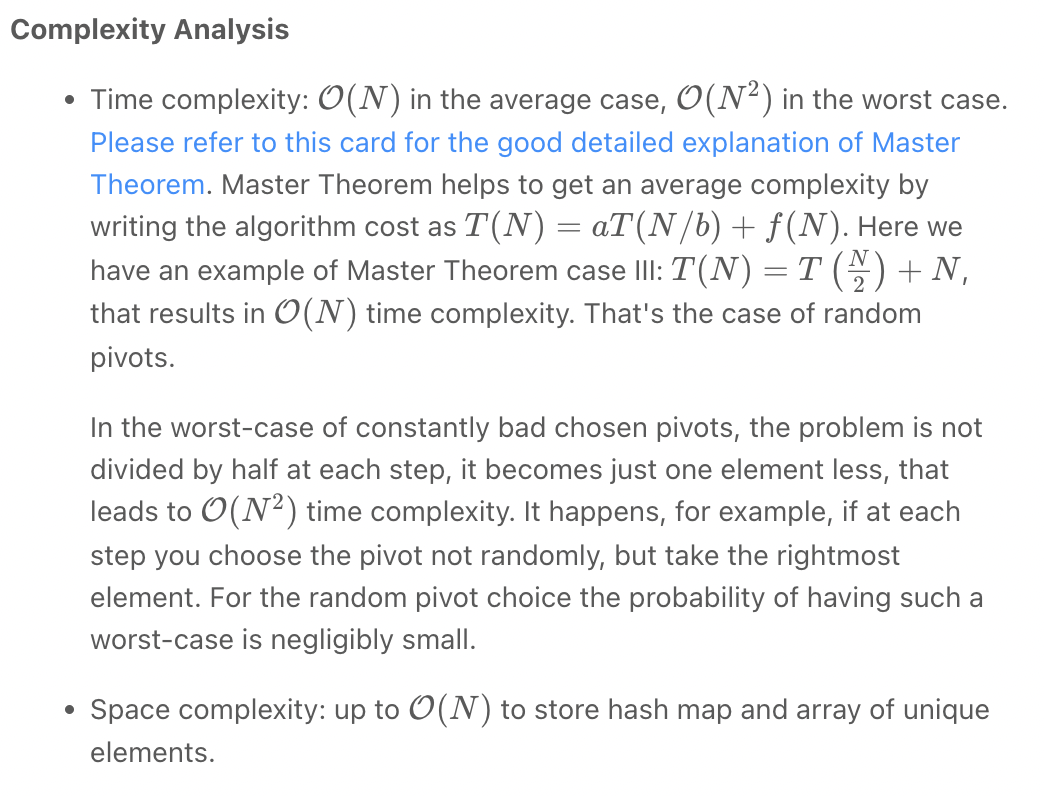



In [10]:
from collections import Counter
class Solution:
    def topKFrequent(self, nums, k):
        count = Counter(nums)
        unique = list(count.keys())
        
        def partition(left, right, pivot_index) -> int:
            pivot_frequency = count[unique[pivot_index]]
            # 1. move pivot to end
            unique[pivot_index], unique[right] = unique[right], unique[pivot_index]  
            
            # 2. move all less frequent elements to the left
            store_index = left
            for i in range(left, right):
                if count[unique[i]] < pivot_frequency:
                    unique[store_index], unique[i] = unique[i], unique[store_index]
                    store_index += 1

            # 3. move pivot to its final place
            unique[right], unique[store_index] = unique[store_index], unique[right]  
            
            return store_index
        
        def quickselect(left, right, k_smallest) -> None:
            """
            Sort a list within left..right till kth less frequent element
            takes its place. 
            """
            # base case: the list contains only one element
            if left == right: 
                return
            
            # select a random pivot_index
            pivot_index = random.randint(left, right)     
                            
            # find the pivot position in a sorted list   
            pivot_index = partition(left, right, pivot_index)
            
            # if the pivot is in its final sorted position
            if k_smallest == pivot_index:
                 return 
            # go left
            elif k_smallest < pivot_index:
                quickselect(left, pivot_index - 1, k_smallest)
            # go right
            else:
                quickselect(pivot_index + 1, right, k_smallest)
         
        n = len(unique) 
        # kth top frequent element is (n - k)th less frequent.
        # Do a partial sort: from less frequent to the most frequent, till
        # (n - k)th less frequent element takes its place (n - k) in a sorted array. 
        # All element on the left are less frequent.
        # All the elements on the right are more frequent.  
        quickselect(0, n - 1, n - k)
        # Return top k frequent elements
        return unique[n - k:]

In [13]:
s = Solution()
nums = [1,1,1,2,2,3]
k = 2
print(s.topKFrequent(nums,k))

[2, 1]


In [78]:
#TBD
import random
def helper(nums,start,end,k,h_m):
        if start >= end:
            return
        pivot = random.randint(start,end)
        nums[start],nums[pivot] = nums[pivot],nums[start]
        left = start
        right = start
        while(right <= end):
            if h_m[nums[right]] < h_m[nums[start]]:
                left+=1
                nums[right],nums[left] = nums[left],nums[right]
            right+=1
        nums[start],nums[left] = nums[left],nums[start]
        if k == left:
            return nums
        if k < left:
            helper(nums,start,left-1,k,h_m)
        if k >left:     
            helper(nums,left+1,end,k,h_m)
        
class Solution:    
    def topKFrequent(self, nums, k):
        h_m = {}
        f_list = []
        for elem in nums:
            if elem in h_m.keys():
                h_m[elem]+=1
            else:
                h_m[elem] = 1
                f_list.append(elem)
        helper(f_list,0,len(f_list)-1,k,h_m)
        return f_list[len(f_list)-k:]     

In [86]:
'''
In below example nums = [4,3,2,1,5,6,6,1,5],
after sorting nums = [1, 1, 2, 3, 4, 5, 5, 6, 6]
we need top 
2-1
3-1
4-1
1-2
5-2
6-2
'''
nums = [1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,3,4,4,4,5,5,6]

s = Solution()
s.topKFrequent(nums,1)

[1]